This will be the start of Our Random Forest Regression model to help us predict team success

In [40]:
import pybaseball as pyb
import pandas as pd
import seaborn as sns
import sklearn as skl
import numpy as np

Get Offensive stats from 1995-present, this is the most modern era of baseball's long, and storied past.

In [41]:
team = pyb.fg_batting_data(1995,2021,stat_columns=['R','wRC','wOBA','WAR','OPS','ISO','OBP','SLG','HR','BB'])

check for missing values with stacking of two calls

In [42]:
team.isna().cumsum()

,IDfg,Season,Name,Team,R,wRC,wOBA,WAR,OPS,ISO,OBP,SLG,HR,BB
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4016,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,0,0,0,0,0,0,0,0,0,0,0,0,0,0


drop na rows 

In [43]:
team.dropna(axis=0)

,IDfg,Season,Name,Team,R,wRC,wOBA,WAR,OPS,ISO,OBP,SLG,HR,BB
0,1109,2002,Barry Bonds,SFG,117,183,0.544,12.7,1.381,0.429,0.582,0.799,46,198
2,1109,2001,Barry Bonds,SFG,129,200,0.537,12.5,1.379,0.536,0.515,0.863,73,177
1,1109,2004,Barry Bonds,SFG,129,185,0.537,11.9,1.422,0.450,0.609,0.812,45,232
42,13611,2018,Mookie Betts,BOS,129,139,0.449,10.4,1.078,0.294,0.438,0.640,32,81
3,1109,2003,Barry Bonds,SFG,111,148,0.503,10.2,1.278,0.408,0.529,0.749,45,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958,8585,2009,Yuniesky Betancourt,- - -,40,38,0.273,-2.4,0.625,0.106,0.274,0.351,6,21
3996,595,1999,Mike Caruso,CHW,60,35,0.261,-2.7,0.577,0.047,0.280,0.297,2,20
4016,620,2002,Neifi Perez,KCR,65,32,0.247,-2.9,0.564,0.067,0.260,0.303,3,20
3338,57,1997,Jose Guillen,PIT,58,56,0.312,-3.1,0.712,0.145,0.300,0.412,14,17


import train_test_split and split from sklearn

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

view columns and assign test_train_split

In [45]:
cols = team.columns.view()
y=team['R']
x=team[['wRC','wOBA','WAR','OPS','ISO','OBP','SLG','HR','BB']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20,random_state=0)

run regressor instance and save to variable

In [46]:
reg = RandomForestRegressor(n_estimators=10, random_state=0)

fit the training sets of X and Y

In [47]:
reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

employ .predict() to predict Wins from our test set of features (X_test) and saved to variable y_predict, while also building a dataframe of all of our data points to easily visualize our regression results

In [48]:
y_predict = reg.predict(x_test)
predict = pd.DataFrame(columns=([['test','predict','diff']]))
predict['test'] = y_test
predict['predict'] = y_predict
predict['diff']=(y_test - y_predict)

use r2_score to check accuracy (1.00 is a Perfect score, will -1.00 is the worst score for the r2_score)

In [49]:
accuracy = r2_score(y_test,y_predict)
print(accuracy)

0.8105010845011305


In [50]:
print('This iteration of this model, has scored '+ str(accuracy))

This iteration of this model, has scored 0.8105010845011305


reshape arrays of columns in predict DF

In [51]:
X=np.array(predict['test']).reshape(-1)
Y=np.array(predict['predict']).reshape(-1)
hue=np.array(predict['diff']).reshape(-1)

plot with seaborn as sns

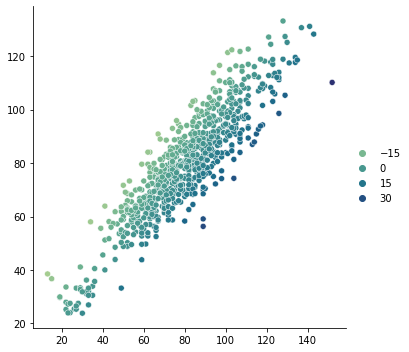

In [54]:
sns.relplot(x=X,y=Y,hue=hue,legend='brief',palette='crest')

use seaborns jointplot with a kind=resid subplot to see how close to no relationship we can get from our model. we will use a lowess smoother to help visualize a zero relationship (ideal)

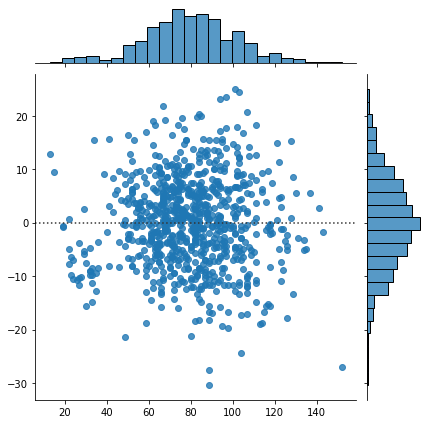

In [67]:

plt = sns.jointplot(x=X,y=Y,kind='resid',palette='crest')
